# Pandas exercise（30个）


---

In [1]:
import pandas as pd

### Step 1.从目录下加载数据文件chipotle.tsv. 导入数据集，读取数据并存为一个名叫chipo的数据框，显示前六行数据

In [2]:
#your code
chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo.head(6)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98


### Step2.显示出全部的列名称,并显示数据集的索引

In [20]:
#全部的列名称
#your code
chipo = pd.read_csv('chipotle.tsv', sep='\t')

chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
#数据集的索引
#your code
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step3. 订单数最多的商品是什么？（查看前五行）

In [30]:
#your code
item_counts = chipo.groupby('item_name').size()
item_counts = item_counts.sort_values(ascending=False)
item_counts.head(5)


item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
dtype: int64

### Step4.从choice_description列观察订单最多的项目是?（查看前五行）

In [9]:
#your code
top_choices = chipo['choice_description'].value_counts()
top_choices.head(5)

choice_description
[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: count, dtype: int64

### Step5.在该数据集对应的时期内，一共有多少订单？

In [ ]:
#your code
chipo['order_id'].nunique()


1834

### Step6.将 item price转成float类型 设字段名为price

In [ ]:
#your code
chipo['price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
chipo['price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: price, Length: 4622, dtype: float64

### Step7.在该数据集对应的时期内，收入(revenue)是多少？
新增sub_price列用于计算revenue sub_price = quantity * price

In [94]:
#your code
chipo['sub_price'] = chipo['quantity'] * chipo['price']
total_revenue = chipo['sub_price'].sum()
total_revenue.item()

39237.02

### Step8.每一单(order)对应的平均总价是多少？

In [95]:
#your code 
average_order_price = total_revenue / chipo['order_id'].nunique()
average_order_price.item()

21.39423118865867

### Step9.一共有多少种不同的商品被售出？

In [27]:
#your code
unique_items_sold = chipo['item_name'].nunique()
unique_items_sold


50

### Step10.只选取item_name这一列

In [ ]:
#your code 
chipo['item_name']


0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

### Step11.该数据集中一共有多少列(columns)

In [31]:
#your code该数据集中一共有多少列(columns)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   price               4622 non-null   float64
 6   sub_price           4622 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 252.9+ KB


### Step12.将数据集中的列 quantity, item_name,和price单独存为一个名叫item的数据框，查看前五行数据

In [47]:
#your code 
item = chipo[['quantity', 'item_name', 'price']]
item.head(5)


,quantity,item_name,price
0,1,Chips and Fresh Tomato Salsa,2.39
1,1,Izze,3.39
2,1,Nantucket Nectar,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,Chicken Bowl,16.98


### Step13.对数据框item按照先price再item_name进行排序（查看前五行）

In [ ]:
#your code 
item.sort_values(by=['price', 'item_name'], ascending=[True, True]).head(5)

,quantity,item_name,price
34,1,Bottled Water,1.09
87,1,Bottled Water,1.09
318,1,Bottled Water,1.09
701,1,Bottled Water,1.09
780,1,Bottled Water,1.09


### Step14.找到进球数price超过25的球队数据

In [ ]:
#your code
chipo[chipo['price'] > 25]

,order_id,quantity,item_name,choice_description,price,sub_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",27.75,83.25
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
3334,1336,3,Steak Bowl,"[Tomatillo Green Chili (Medium), [Rice, Black ...",26.07,78.21
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25


### Step15.选取除了最后1列之外的全部列

In [54]:
#your code选取除了最后1列之外的全部列
chipo.iloc[:, :-1]

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step 16.  从目录中加载数据appl_1980_2014.csv. 导入数据集，读取数据并存为一个名叫apple的数据框

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#your code 
apple = pd.read_csv('appl_1980_2014.csv')

### Step17. 查看前五行的内容和每一列的数据类型

In [84]:
#your code 
apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [85]:
# your code
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 18.数据框中有缺失值吗？

In [86]:
#your code
missing_values = apple.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [87]:
# your code
has = (missing_values > 0)
has.any().item()

False

### Step 19.将列Volume的第10到19行设置为缺失值

In [88]:
#your code 
apple.loc[10:19, 'Volume'] = np.nan
apple[10:20]

,Date,Open,High,Low,Close,Volume,Adj Close
10,2014-06-23,91.32,91.62,90.60,90.83,NaN,90.83
11,2014-06-20,91.85,92.55,90.90,90.91,NaN,90.91
12,2014-06-19,92.29,92.30,91.34,91.86,NaN,91.86
13,2014-06-18,92.27,92.29,91.35,92.18,NaN,92.18
14,2014-06-17,92.31,92.70,91.80,92.08,NaN,92.08
15,2014-06-16,91.51,92.75,91.45,92.20,NaN,92.20
16,2014-06-13,92.20,92.44,90.88,91.28,NaN,91.28
17,2014-06-12,94.04,94.12,91.90,92.29,NaN,92.29
18,2014-06-11,94.13,94.76,93.47,93.86,NaN,93.86
19,2014-06-10,94.73,95.05,93.57,94.25,NaN,94.25


### Step 20.将缺失值全部替换为1.0

In [89]:
#your code 
apple_filled = apple.fillna(1.0)

### Step 21.删除列Volume

In [ ]:
#your code 
del apple['Volume']
apple

,Date,Open,High,Low,Close,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,93.52
...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,0.42


### Step 22.计算Open平均值

In [93]:
#your code 
apple['Open'].mean().item()


98.59392557590078

### Step 23.将Date这个列转换为datetime类型

In [96]:
#your code 
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 24.将Date设置为索引

In [97]:
#your code
apple.set_index('Date', inplace=True)

### Step 25.是否有重复的日期？

In [98]:
#your code
duplicate_index = apple.index.duplicated()
duplicate_index.any().item()

False

### Step 26.将index设置为升序（显示前五行）

In [99]:
#your code
apple.sort_index(ascending=True, inplace=True)
apple.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,0.45
1980-12-15,27.38,27.38,27.25,27.25,0.42
1980-12-16,25.37,25.37,25.25,25.25,0.39
1980-12-17,25.87,26.00,25.87,25.87,0.40
1980-12-18,26.63,26.75,26.63,26.63,0.41


### Step 27.找到每个月的最后一个交易日(business day)（显示前五行） 
（yyyy-mm算做一个月）

In [104]:
#your code
last_day_per_month = apple.resample('ME').last()
last_day_per_month.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-31,34.25,34.25,34.13,34.13,0.53
1981-01-31,28.50,28.50,28.25,28.25,0.44
1981-02-28,26.50,26.75,26.50,26.50,0.41
1981-03-31,24.75,24.75,24.50,24.50,0.38
1981-04-30,28.38,28.62,28.38,28.38,0.44


### Step 28.数据集中最早的日期和最晚的日期相差多少天？

In [106]:
#your code
earliest_date = apple.index.min()  
latest_date = apple.index.max()    
days_diff = (latest_date - earliest_date).days
days_diff

12261

### Step 29.在数据中一共有多少个月？

In [107]:
#your code
month_count = apple.index.to_period('M').nunique()
month_count

404

### Step 30.按照时间顺序可视化Adj Close值

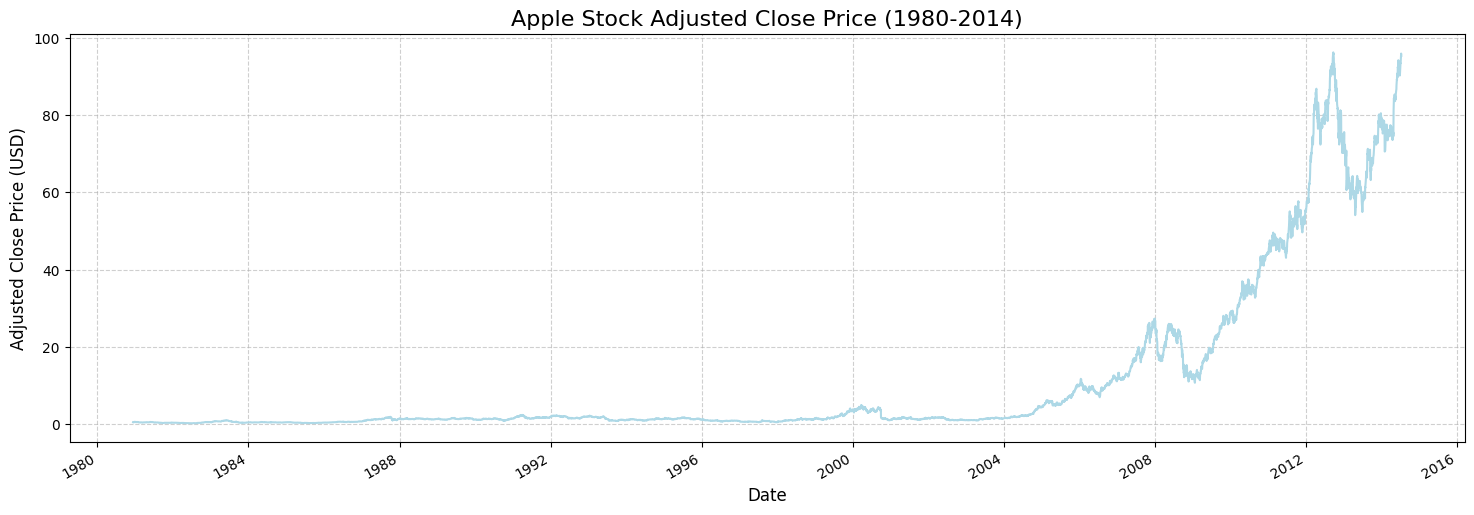

In [110]:
#your code
plt.figure(figsize=(18, 6)) 
plt.plot(apple.index, apple['Adj Close'], color='lightblue', linewidth=1.5)

plt.title('Apple Stock Adjusted Close Price (1980-2014)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  
plt.gcf().autofmt_xdate()  
plt.show()